In [1]:
!wget https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip

--2023-04-23 07:39:48--  https://s3-ap-southeast-1.amazonaws.com/he-public-data/datasetb2d9982.zip
Resolving s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)... 52.219.124.90
Connecting to s3-ap-southeast-1.amazonaws.com (s3-ap-southeast-1.amazonaws.com)|52.219.124.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 895569552 (854M) [binary/octet-stream]
Saving to: ‘datasetb2d9982.zip’

datasetb2d9982.zip  100%[===================>] 854.08M  13.3MB/s    in 65s     

2023-04-23 07:40:54 (13.1 MB/s) - ‘datasetb2d9982.zip’ saved [895569552/895569552]



In [2]:
!unzip /content/datasetb2d9982.zip

Archive:  /content/datasetb2d9982.zip
   creating: dataset/
  inflating: dataset/sample_submission.csv  
  inflating: dataset/train.csv       
  inflating: dataset/test.csv        


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

In [4]:
df = pd.read_csv('/content/dataset/train.csv')
df.head()

,PRODUCT_ID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCT_TYPE_ID,PRODUCT_LENGTH
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112,598.424000


In [5]:
df.shape

(2249698, 6)

In [6]:
## checking for the missing values in the dataset
df.isnull().sum()

PRODUCT_ID               0
TITLE                   12
BULLET_POINTS       837364
DESCRIPTION        1157381
PRODUCT_TYPE_ID          0
PRODUCT_LENGTH           0
dtype: int64

In [7]:
df.describe()

,PRODUCT_ID,PRODUCT_TYPE_ID,PRODUCT_LENGTH
count,2.249698e+06,2.249698e+06,2.249698e+06
mean,1.499795e+06,4.000456e+03,4.071839e+03
std,8.661944e+05,3.966146e+03,1.351685e+06
min,1.000000e+00,0.000000e+00,1.000000e+00
25%,7.494795e+05,2.300000e+02,5.118110e+02
50%,1.499558e+06,2.916000e+03,6.630000e+02
75%,2.250664e+06,6.403000e+03,1.062992e+03
max,2.999999e+06,1.342000e+04,1.885801e+09


In [8]:
df.drop(['TITLE', 'BULLET_POINTS', 'DESCRIPTION', 'PRODUCT_TYPE_ID'], axis=1, inplace= True)

In [9]:
df

,PRODUCT_ID,PRODUCT_LENGTH
0,1925202,2125.980000
1,2673191,393.700000
2,2765088,748.031495
3,1594019,787.401574
4,283658,598.424000
...,...,...
2249693,2422167,1181.100000
2249694,2766635,125.984252
2249695,1987786,1200.000000
2249696,1165754,2900.000000


In [10]:
df.isnull().sum()

PRODUCT_ID        0
PRODUCT_LENGTH    0
dtype: int64

<Axes: xlabel='PRODUCT_LENGTH'>

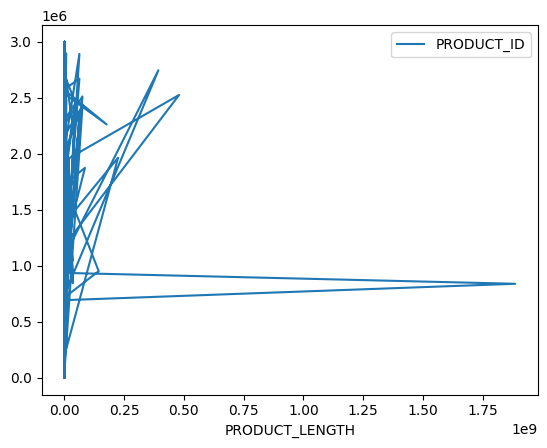

In [11]:
df.plot('PRODUCT_LENGTH')

<Axes: >

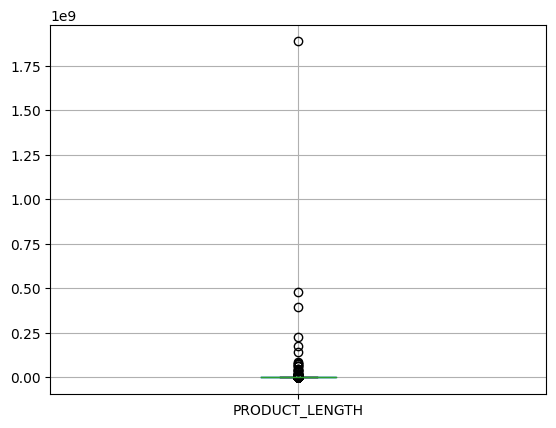

In [12]:
df.boxplot('PRODUCT_LENGTH')

In [13]:
xVar = df['PRODUCT_ID'].values.reshape(-1,1)
yVar = df['PRODUCT_LENGTH'].values.reshape(-1,1)

In [14]:
xVar.shape

(2249698, 1)

In [15]:
yVar.shape

(2249698, 1)

In [24]:


# Generate a random regression dataset
xVar, yVar = make_regression(n_samples=734736, n_features=10, n_informative=5, noise=0.4, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xVar, yVar, test_size=0.5, random_state=42)

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SGDRegressor model with appropriate hyperparameters
lr = 0.01 # learning rate
max_iter = 1000 # maximum number of iterations
tol = 1e-3 # tolerance for early stopping
sgd = SGDRegressor(loss='huber', learning_rate='constant', eta0=lr, max_iter=max_iter, tol=tol)

# Train the model on the training data using stochastic gradient descent
sgd.fit(X_train, y_train)

# Reshape the test data to have the same number of features as the training data
X_test_reshaped = X_test.reshape((-1, 10))

# Predict the target variable for the test data
y_pred_scaled = sgd.predict(X_test_reshaped)
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1) # Reshape to a 2D array with shape (n_samples, 1)

# Convert the scaled predictions back to the original scale
y_pred = scaler.inverse_transform(np.hstack((y_pred_scaled_2d, np.zeros((len(y_pred_scaled_2d), 9)))))

# Reshape the predicted values to match the shape of the original target variable
y_pred_2d = y_pred.reshape(-1,1)
y_pred_reshaped = y_pred_2d[:len(yVar)].reshape(-1)



In [25]:
import sklearn.metrics as metrics
score = max( 0 , 100*(1-metrics.mean_absolute_percentage_error(y_test, y_pred_scaled)))

In [26]:
score

97.36587239252414

In [27]:
y_pred_reshaped.shape

(734736,)

In [28]:
test_data = pd.read_csv('/content/dataset/test.csv')

In [29]:
test_data['PRODUCT_ID'].shape

(734736,)

In [30]:

# Get the PRODUCT_ID column from the test dataset
product_ids = test_data['PRODUCT_ID']

# Create a DataFrame with the predicted PRODUCT_LENGTH values and the corresponding PRODUCT_ID values
submission_df = pd.DataFrame({'PRODUCT_ID': product_ids, 'PRODUCT_LENGTH': y_pred_reshaped})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


In [31]:
submission_df

,PRODUCT_ID,PRODUCT_LENGTH
0,604373,172.751248
1,1729783,0.002655
2,1871949,-0.000310
3,1107571,-0.000033
4,624253,-0.002267
...,...,...
734731,921419,0.002655
734732,2456362,-0.000310
734733,841529,-0.000033
734734,1190194,-0.002267
